Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [326]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [327]:
df = pd.read_csv(r"C:\Users\HP\Desktop\census_income.csv",engine='python')

In [328]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K



age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. Final weight on cps files

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target- salary <=50 or >=50

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [330]:
df.shape

(32560, 15)

In [331]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

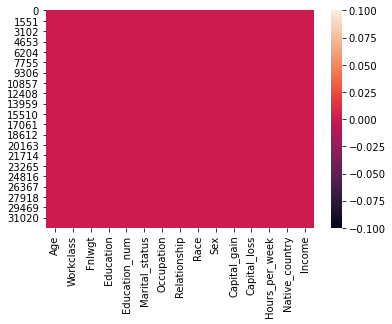

In [332]:
sns.heatmap(df.isna())

In [333]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [334]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [335]:
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

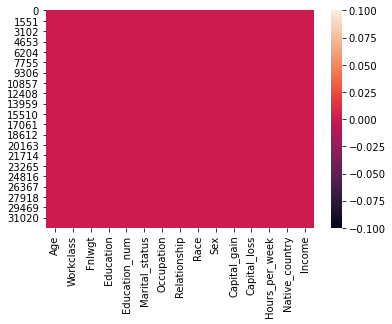

In [336]:
sns.heatmap(df.isna())

over all we have-->>>>>>>>

Size of training set: 32560 records


target variable is 'income'

there are few null values in the dataset

__feature processing__

<b>age<b>

In [337]:
df.Age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: Age, Length: 73, dtype: int64

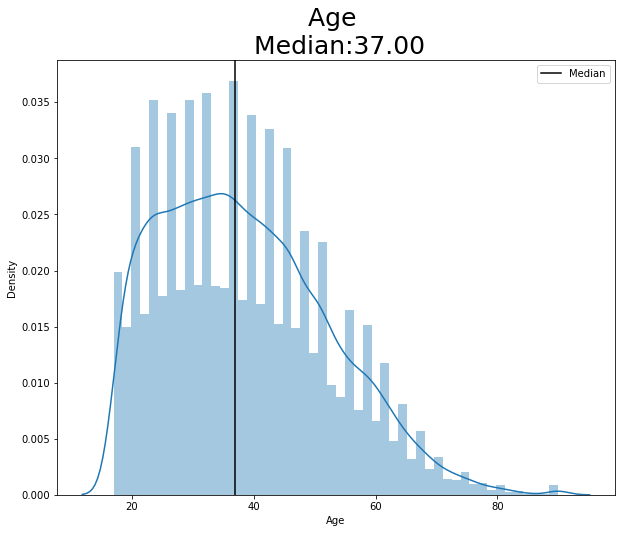

In [338]:
plt.figure(figsize=(10,8))
sns.distplot(df['Age'])
plt.title('Age \n Median:{0:.2f}'.format(df['Age'].median()),size=25)
plt.axvline(df['Age'].median(),color='black',label='Median')
plt.legend()

removal of outliers

<AxesSubplot:xlabel='Age'>

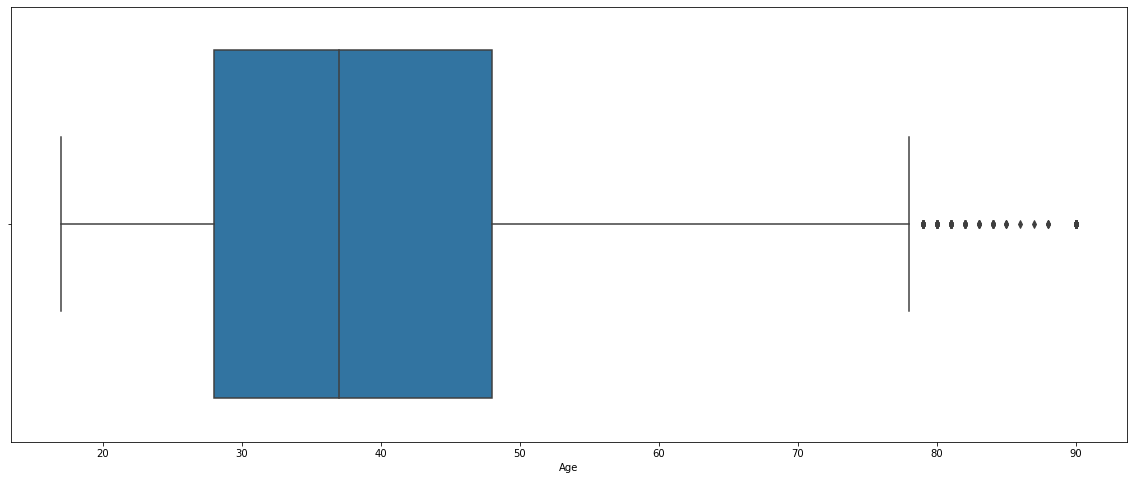

In [339]:
plt.figure(figsize=(20,8))
sns.boxplot(df.Age)

In [340]:
# above plot shows outliers may be present about 0.99 quantile.
# Let's remove those observations whose lies above 99% of all the ages.
q = df.Age.quantile(0.99)

<AxesSubplot:title={'center':'age without outliers'}, xlabel='Age'>

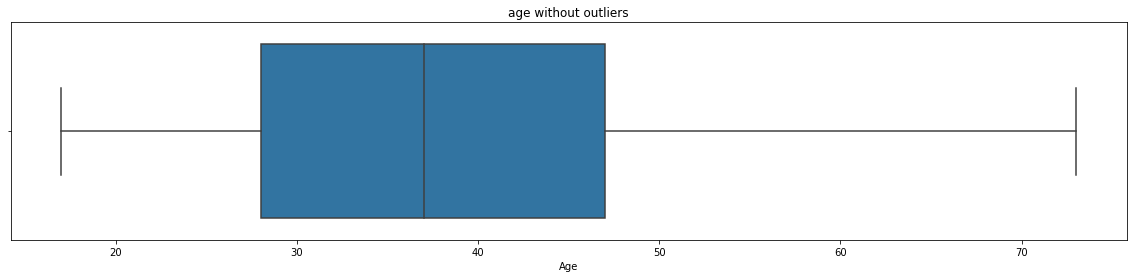

In [341]:
plt.figure(figsize=(20,4))
plt.title('age without outliers')
sns.boxplot(df[df.Age<q]['Age'])

In [342]:
df = df[df.Age<q]

plot shows that maximum data lies between 20-60 age only

<AxesSubplot:xlabel='Age', ylabel='Density'>

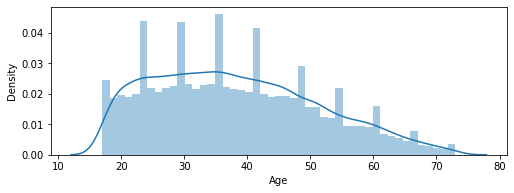

In [343]:
fig = plt.figure(figsize=(18,6))

fig.add_subplot(221)
sns.distplot(df.Age)

overall for age column-->>>

outliers are removed but above plot is very little bit skewed

__workclass__

In [344]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [345]:
df.Workclass.value_counts()

 Private             22570
 Self-emp-not-inc     2475
 Local-gov            2076
 ?                    1744
 State-gov            1292
 Self-emp-inc         1090
 Federal-gov           955
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [346]:
df['Workclass']=df['Workclass'].replace({" ?":"Labour"})


<AxesSubplot:xlabel='Workclass', ylabel='count'>

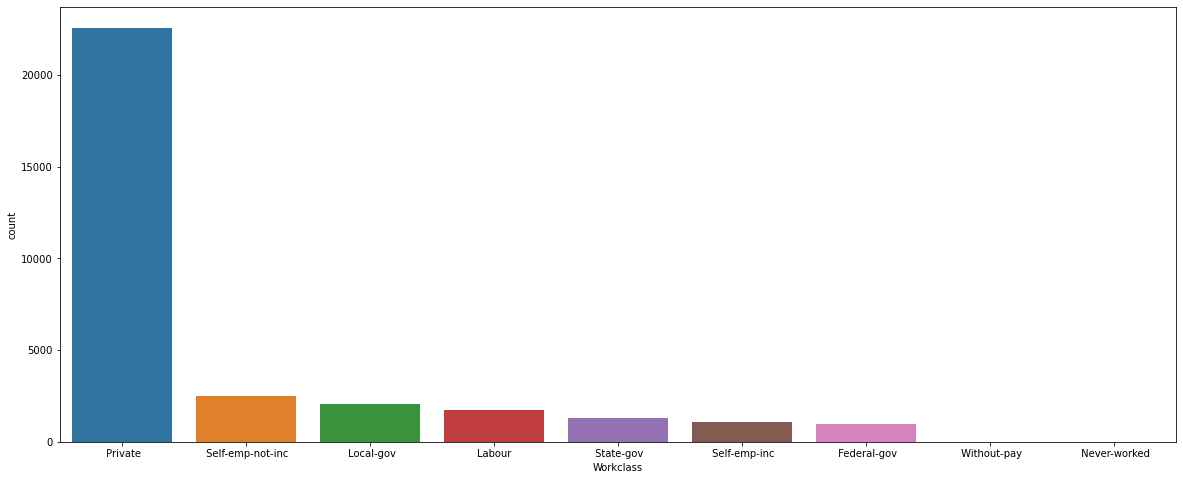

In [347]:
plt.figure(figsize=(20,8))
sns.countplot(df.Workclass,order=df.Workclass.value_counts().index)

In [348]:
countprivate = len(df[df.Workclass == ' Private'])
print("Percentage of private: {:.2f}%".format((countprivate / (len(df.Workclass))*100)))

Percentage of private: 70.04%


In [349]:
df.Workclass.value_counts()

 Private             22570
 Self-emp-not-inc     2475
 Local-gov            2076
Labour                1744
 State-gov            1292
 Self-emp-inc         1090
 Federal-gov           955
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:>

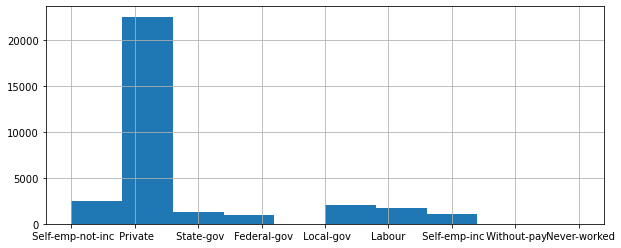

In [350]:
plt.figure(figsize=(10,4))
df.Workclass.hist()

above plot shows that highest number of people almost 70 % are in private sector

In [351]:
#The attributes of the workclass columns : never worked is too less to positively impact the data.
# Thus removing those values would be a better option for our modelling

In [352]:
df_cleaned = df[df.Workclass !=' Never-worked']


<AxesSubplot:>

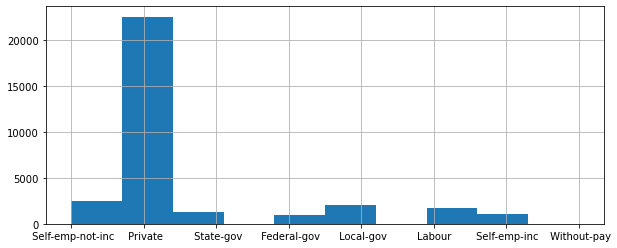

In [353]:
plt.figure(figsize=(10,4))
df_cleaned.Workclass.hist()

In [354]:
df_cleaned.Workclass.value_counts()

 Private             22570
 Self-emp-not-inc     2475
 Local-gov            2076
Labour                1744
 State-gov            1292
 Self-emp-inc         1090
 Federal-gov           955
 Without-pay            14
Name: Workclass, dtype: int64

__overall 70% people are working in private sector__

#### Education and Education-num


In [355]:
df_cleaned.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [356]:
df_cleaned.Education.value_counts()

 HS-grad         10398
 Some-college     7238
 Bachelors        5314
 Masters          1701
 Assoc-voc        1374
 11th             1166
 Assoc-acdm       1062
 10th              918
 7th-8th           613
 Prof-school       562
 9th               503
 12th              432
 Doctorate         403
 5th-6th           322
 1st-4th           160
 Preschool          50
Name: Education, dtype: int64

In [357]:
df_cleaned.Education = df_cleaned.Education.str.lstrip()

In [358]:
df_cleaned.Education.value_counts()

HS-grad         10398
Some-college     7238
Bachelors        5314
Masters          1701
Assoc-voc        1374
11th             1166
Assoc-acdm       1062
10th              918
7th-8th           613
Prof-school       562
9th               503
12th              432
Doctorate         403
5th-6th           322
1st-4th           160
Preschool          50
Name: Education, dtype: int64

<AxesSubplot:>

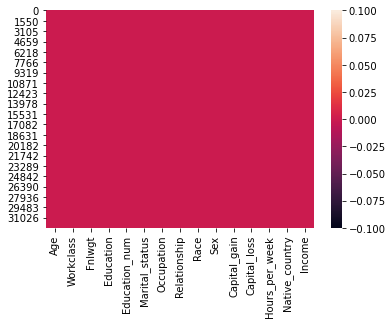

In [359]:
sns.heatmap(df_cleaned.isna())

<AxesSubplot:xlabel='Education', ylabel='count'>

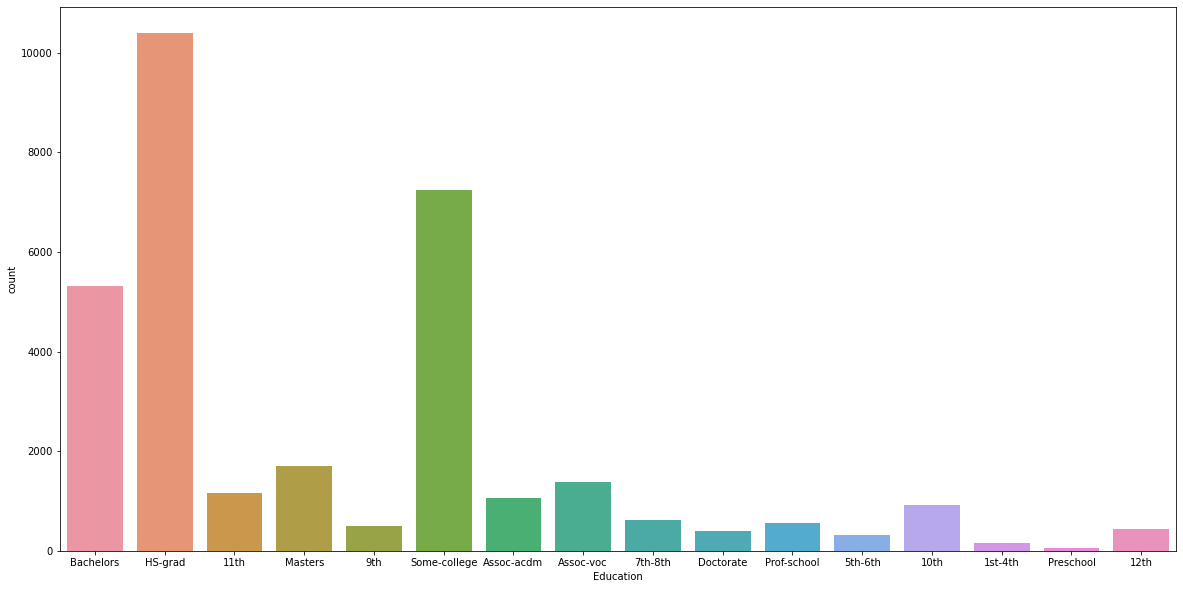

In [360]:
plt.figure(figsize=(20,10))
sns.countplot(df_cleaned.Education)

In [361]:
# Check the correlation between features education and education number
edu_df = df_cleaned.iloc[:,3:5].copy()
edu_df.sort_values(by='Education_num',inplace=True)

<AxesSubplot:xlabel='Education', ylabel='Education_num'>

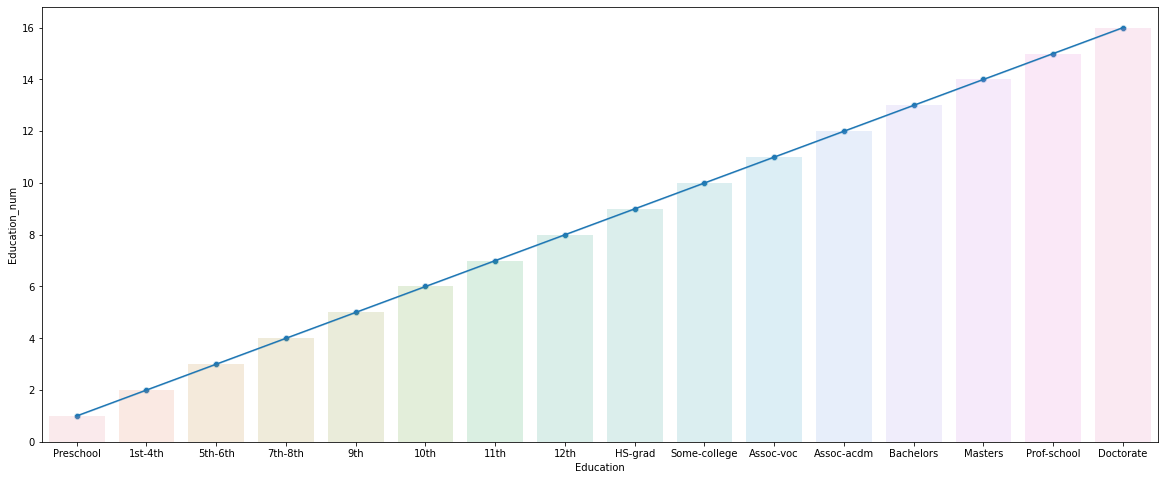

In [362]:
plt.figure(figsize=(20,8))
sns.scatterplot(edu_df.iloc[:,0],edu_df.iloc[:,1])
sns.lineplot(edu_df.iloc[:,0],edu_df.iloc[:,1])
sns.barplot(edu_df.iloc[:,0],edu_df.iloc[:,1],alpha=0.2)

We can see that the education number represents the  encoding of the education feature
So we should drop the column education from the dataset

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

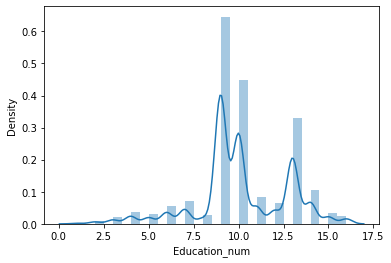

In [363]:
sns.distplot(df_cleaned['Education_num'],bins=30)

In [364]:
# let's drop the education column from the df_cleaned dataset
df_cleaned.drop('Education',1,inplace=True)

In [365]:
df_cleaned.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### Maritial-Status

In [366]:
df_cleaned['Marital_status'].value_counts()

 Married-civ-spouse       14810
 Never-married            10645
 Divorced                  4426
 Separated                 1022
 Widowed                    880
 Married-spouse-absent      411
 Married-AF-spouse           22
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

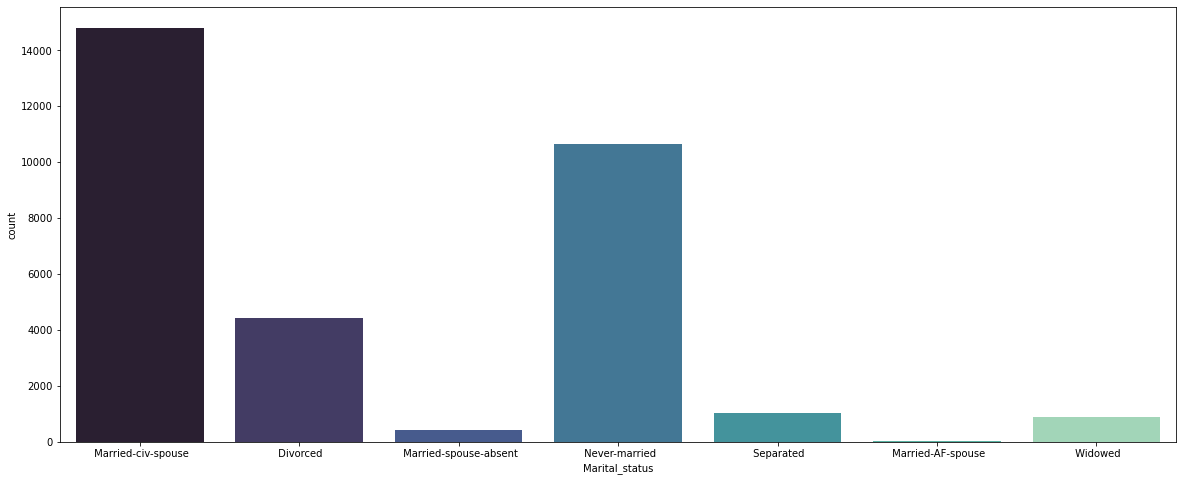

In [367]:
plt.figure(figsize=(20,8))
sns.countplot('Marital_status',data=df_cleaned,palette='mako')

this column has no null values and its in order

#### Occupation

In [368]:
df_cleaned.Occupation.value_counts()

 Prof-specialty       4103
 Craft-repair         4083
 Exec-managerial      4020
 Adm-clerical         3739
 Sales                3616
 Other-service        3266
 Machine-op-inspct    1996
 ?                    1744
 Transport-moving     1589
 Handlers-cleaners    1364
 Farming-fishing       977
 Tech-support          928
 Protective-serv       642
 Priv-house-serv       140
 Armed-Forces            9
Name: Occupation, dtype: int64

lets us replace '?' with other services

In [369]:
df_cleaned['Occupation']=df_cleaned['Occupation'].replace({' ?':' Other-works'})

<AxesSubplot:xlabel='Occupation', ylabel='count'>

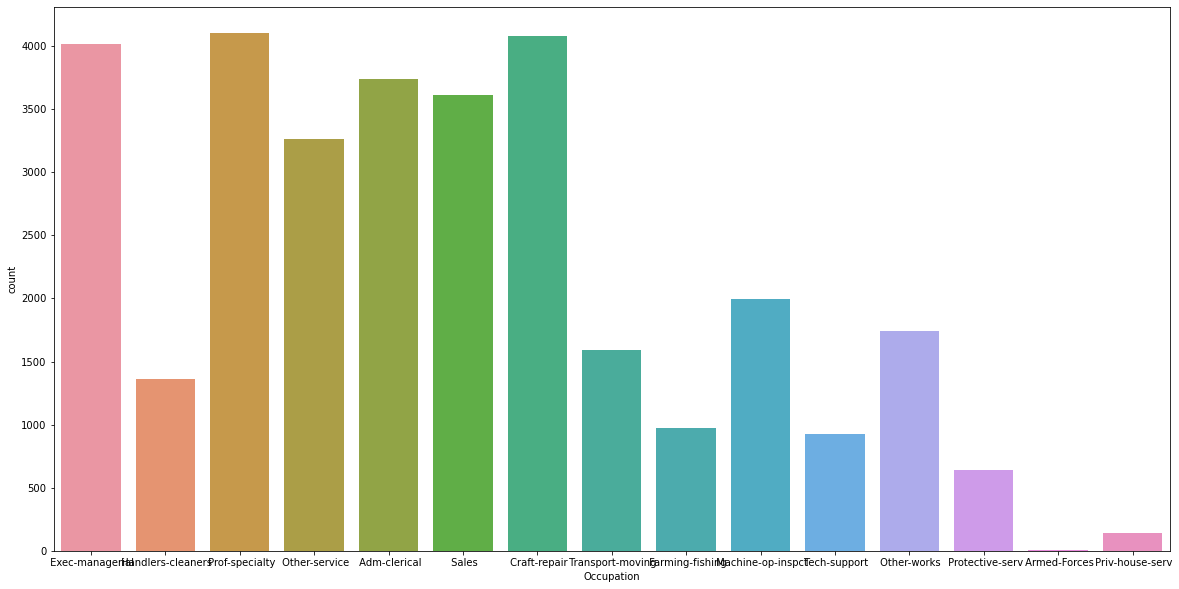

In [370]:
plt.figure(figsize=(20,10))
sns.countplot(df_cleaned.Occupation)

now, we have no null values

__relationship__

In [371]:
df_cleaned.Relationship.value_counts()

 Husband           13035
 Not-in-family      8167
 Own-child          5057
 Unmarried          3424
 Wife               1561
 Other-relative      972
Name: Relationship, dtype: int64

<AxesSubplot:xlabel='Relationship', ylabel='count'>

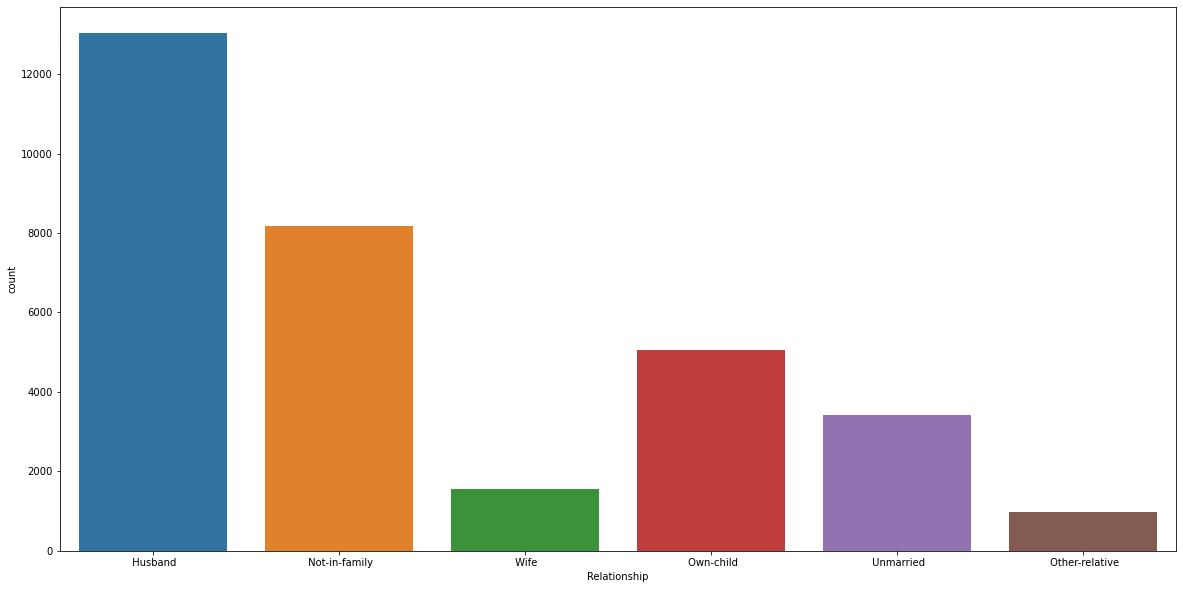

In [372]:
plt.figure(figsize=(20,10))
sns.countplot(df_cleaned.Relationship)

__Native Country__

In [373]:
df_cleaned['Native_country'].value_counts()

 United-States                 28854
 Mexico                          641
 ?                               578
 Philippines                     196
 Germany                         136
 Canada                          119
 Puerto-Rico                     113
 El-Salvador                     105
 India                           100
 Cuba                             93
 England                          89
 Jamaica                          81
 South                            78
 China                            74
 Italy                            72
 Dominican-Republic               69
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Columbia                         58
 Poland                           57
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         36
 Nicaragua                        34
 Peru                             31
 

In [374]:
df_cleaned['Native_country']=df_cleaned['Native_country'].replace({' ?':' Other-country'})

In [375]:
df_cleaned['Native_country'].value_counts()

 United-States                 28854
 Mexico                          641
 Other-country                   578
 Philippines                     196
 Germany                         136
 Canada                          119
 Puerto-Rico                     113
 El-Salvador                     105
 India                           100
 Cuba                             93
 England                          89
 Jamaica                          81
 South                            78
 China                            74
 Italy                            72
 Dominican-Republic               69
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Columbia                         58
 Poland                           57
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         36
 Nicaragua                        34
 Peru                             31
 

In [376]:
countusa = len(df_cleaned[df_cleaned.Native_country == ' United-States'])
print("Percentage of usa: {:.2f}%".format((countusa / (len(df_cleaned.Native_country))*100)))

Percentage of usa: 89.56%


almost 90 percent of people are from usa, and rest 10 percent are from other parts

as other than usa there are different countries so

Thus we can seperate it in 2 attributes
People living in USA
People not living in the states

In [377]:
df_cleaned['Native_country']=df_cleaned['Native_country'].apply(lambda x:'Native' if x==' United-States' else 'Migrant')

<AxesSubplot:xlabel='Native_country', ylabel='count'>

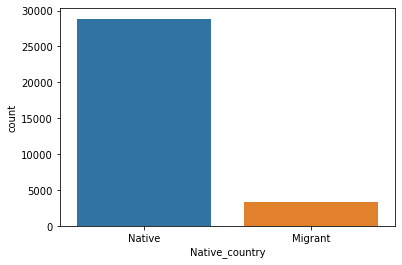

In [378]:
sns.countplot(df_cleaned['Native_country'])

In [379]:
df_cleaned.rename(columns={'Native_country':'native/migrant'},inplace=True)

In [380]:
df_cleaned['native/migrant'].value_counts()

Native     28854
Migrant     3362
Name: native/migrant, dtype: int64

#### Race

In [381]:
df_cleaned.Race.value_counts()

 White                 27511
 Black                  3099
 Asian-Pac-Islander     1029
 Amer-Indian-Eskimo      308
 Other                   269
Name: Race, dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

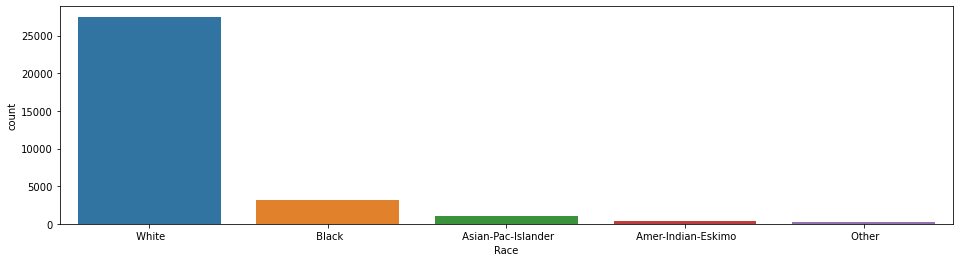

In [382]:
plt.figure(figsize=(16,4))
sns.countplot(df_cleaned.Race)

In [383]:
countwhite = len(df_cleaned[df_cleaned.Race == ' White'])
print("Percentage of usa: {:.2f}%".format((countwhite / (len(df_cleaned.Race))*100)))

Percentage of usa: 85.40%


almost 85 percent people are white and 15 percent are others means data is biased

In [384]:
df_cleaned.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,native/migrant,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,Native,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,Native,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,Native,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Migrant,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,Native,<=50K


__Hours_per_week__

In [385]:
df_cleaned.Hours_per_week.value_counts()

40    15148
50     2806
45     1817
60     1471
35     1279
      ...  
92        1
94        1
87        1
74        1
82        1
Name: Hours_per_week, Length: 94, dtype: int64

<AxesSubplot:xlabel='Hours_per_week'>

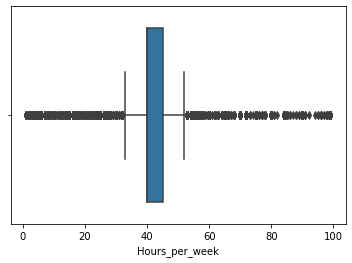

In [386]:
sns.boxplot(df_cleaned['Hours_per_week'])

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

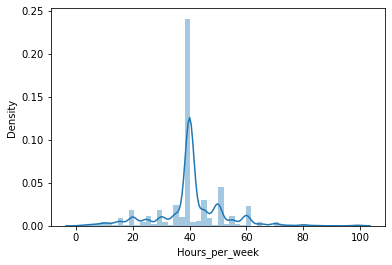

In [387]:
sns.distplot(df_cleaned['Hours_per_week'])

In [388]:
df_cleaned['Hours_per_week'].describe()

count    32216.000000
mean        40.594580
std         12.212099
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours_per_week, dtype: float64

on an average, works is about 6 hours

#### Capital-gain / Capital-loss / fnlwgt

In [389]:
df_cleaned.Capital_gain.value_counts()

0        29553
15024      347
7688       284
7298       246
99999      157
         ...  
1111         1
7978         1
2538         1
2062         1
18481        1
Name: Capital_gain, Length: 117, dtype: int64

In [390]:
df_cleaned.Capital_loss.value_counts()

0       30713
1902      202
1977      168
1887      159
1848       51
        ...  
2149        1
1816        1
2489        1
1844        1
1735        1
Name: Capital_loss, Length: 91, dtype: int64

In [391]:
29553/len(df_cleaned)*100

91.73392103302706

In [392]:
30713/len(df_cleaned)*100

95.33461633970698

More than 91% of data is 0 in the features capital_gain and capital_loss
Thus ,it is a best option to drop both the columns
The fnlwgt (final weight) feature should be removed as it has not co related

In [393]:
df_cleaned.drop(['Capital_loss','Capital_gain','Fnlwgt'],1,inplace=True)

In [394]:
df_cleaned.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,native/migrant,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,Native,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,Native,<=50K
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,Native,<=50K
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Migrant,<=50K
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,Native,<=50K


__sex__

In [395]:
df_cleaned.Sex.value_counts()

 Male      21555
 Female    10661
Name: Sex, dtype: int64

In [396]:
countmale = len(df_cleaned[df_cleaned.Sex == ' Male'])
print("Percentage of usa: {:.2f}%".format((countmale / (len(df_cleaned.Sex))*100)))

Percentage of usa: 66.91%


In [397]:
countfemale = len(df_cleaned[df_cleaned.Sex == ' Female'])
print("Percentage of usa: {:.2f}%".format((countfemale / (len(df_cleaned.Sex))*100)))

Percentage of usa: 33.09%


men are almost twice than female in the dataset which is fine

## Multivariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

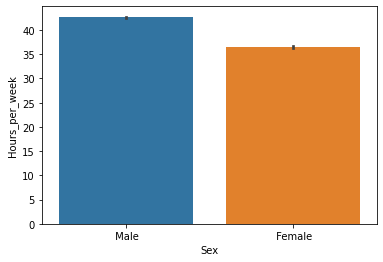

In [398]:
sns.barplot(df_cleaned.Sex,df_cleaned['Hours_per_week'])

above plot show males work more than female 

<AxesSubplot:xlabel='Education_num', ylabel='Hours_per_week'>

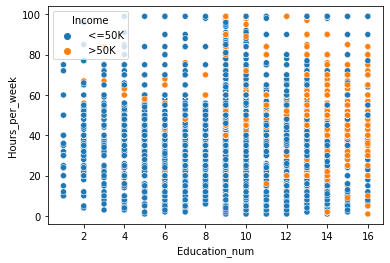

In [399]:
sns.scatterplot(df_cleaned['Education_num'],df_cleaned['Hours_per_week'],hue=df_cleaned.Income,palette='tab10')

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

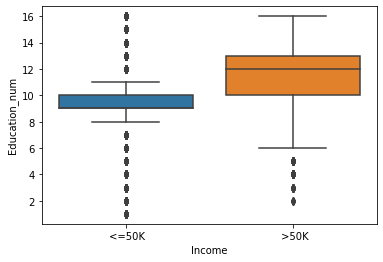

In [400]:
sns.boxplot(df_cleaned.Income,df_cleaned['Education_num'])

shows if you are highly educated, salary will be more than 50 k and also if hours per week is high than also salary must be  more than 50 k

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

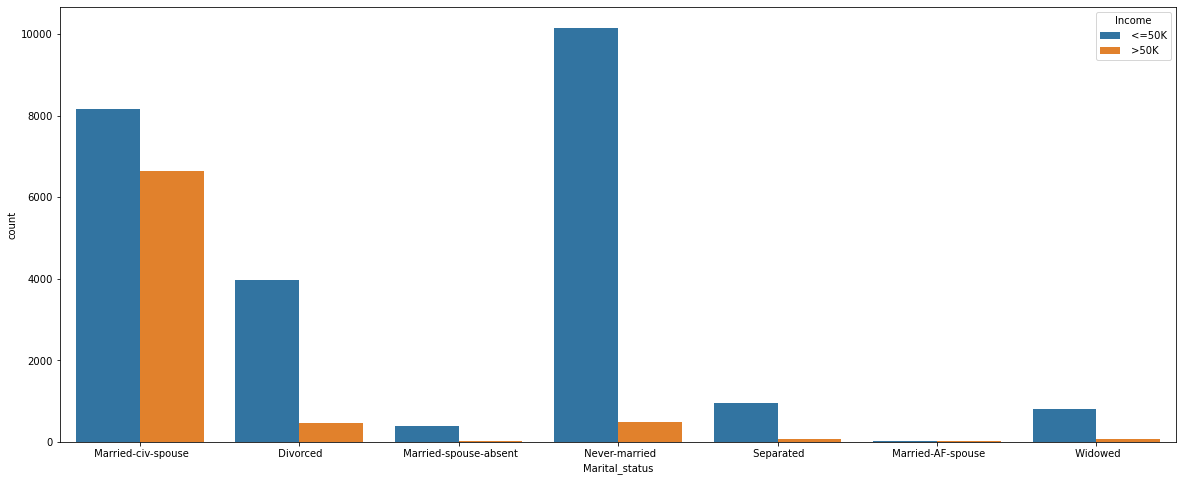

In [401]:
plt.figure(figsize=(20,8))
sns.countplot(df_cleaned['Marital_status'],hue=df_cleaned.Income)

above plot shows that the most married and never married individuals do make salary equal or more than 50 k

<AxesSubplot:xlabel='Race', ylabel='Education_num'>

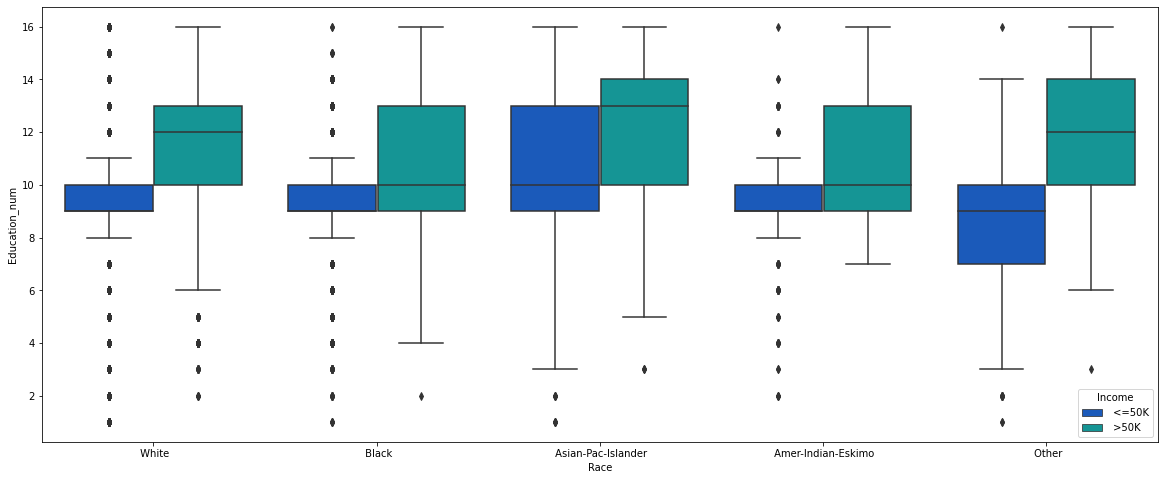

In [402]:
plt.figure(figsize=(20,8))
sns.boxplot(df_cleaned['Race'],df_cleaned['Education_num'],df_cleaned.Income,palette='winter')

above plot shows that race doesnt co related with eduction level

<AxesSubplot:xlabel='Race', ylabel='Hours_per_week'>

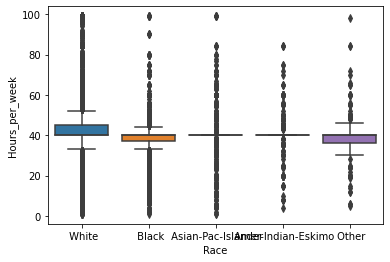

In [403]:
sns.boxplot(df_cleaned.Race,df_cleaned['Hours_per_week'])

above plot shows everyone is working on same average number of hours

<AxesSubplot:xlabel='Occupation', ylabel='count'>

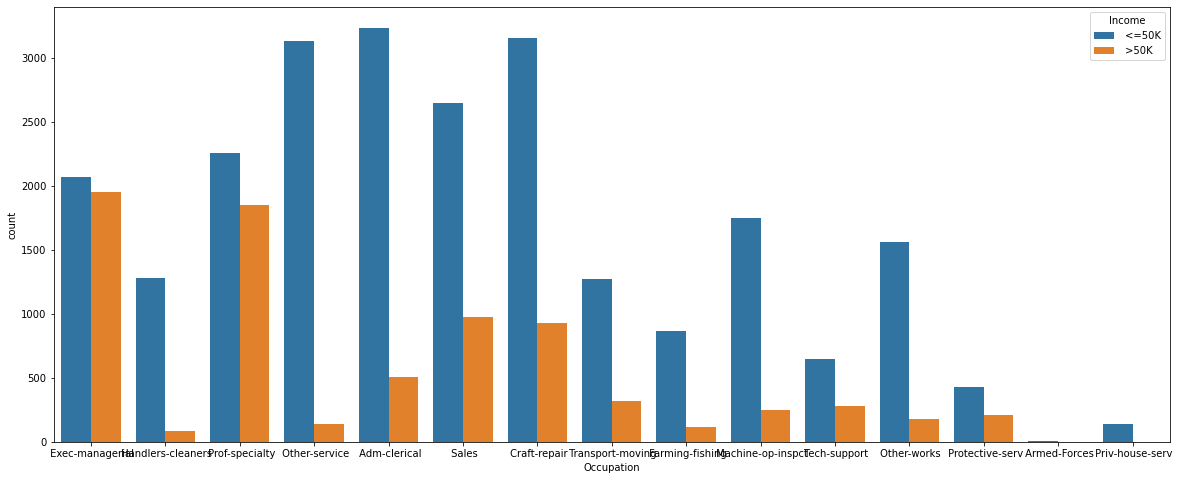

In [404]:
plt.figure(figsize=(20,8))
sns.countplot(df_cleaned['Occupation'],hue=df_cleaned.Income)

other services,adm-clerical and craft repair do have maximum count of people making more than 50k

__Target value__

In [405]:
df_cleaned.Income.value_counts()

 <=50K    24434
 >50K      7782
Name: Income, dtype: int64

__Lets level encode the categoreical variables__


In [406]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_cleaned['Income']=LE.fit_transform(df_cleaned['Income'])
df_cleaned['Sex']=LE.fit_transform(df_cleaned['Sex'])
df_cleaned['native/migrant']=LE.fit_transform(df_cleaned['native/migrant'])

In [407]:
df_cleaned['Workclass'] =pd.get_dummies(df_cleaned['Workclass'], drop_first=True) 
df_cleaned['Education_num'] =pd.get_dummies(df_cleaned['Education_num'], drop_first=True)
df_cleaned['Marital_status'] =pd.get_dummies(df_cleaned['Marital_status'], drop_first=True)
df_cleaned['Occupation'] =pd.get_dummies(df_cleaned['Occupation'], drop_first=True)
df_cleaned['Relationship'] =pd.get_dummies(df_cleaned['Relationship'], drop_first=True)
df_cleaned['Race'] =pd.get_dummies(df_cleaned['Race'], drop_first=True)

In [408]:
df_cleaned.head()


,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,native/migrant,Income
0,50,0,0,0,0,0,0,1,13,1,0
1,38,0,0,0,0,1,0,1,40,1,0
2,53,0,0,0,0,0,0,1,40,1,0
3,28,0,0,0,0,0,0,0,40,0,0
4,37,0,0,0,0,0,0,0,40,1,0


In [409]:
df_cleaned.shape

(32216, 11)

<AxesSubplot:>

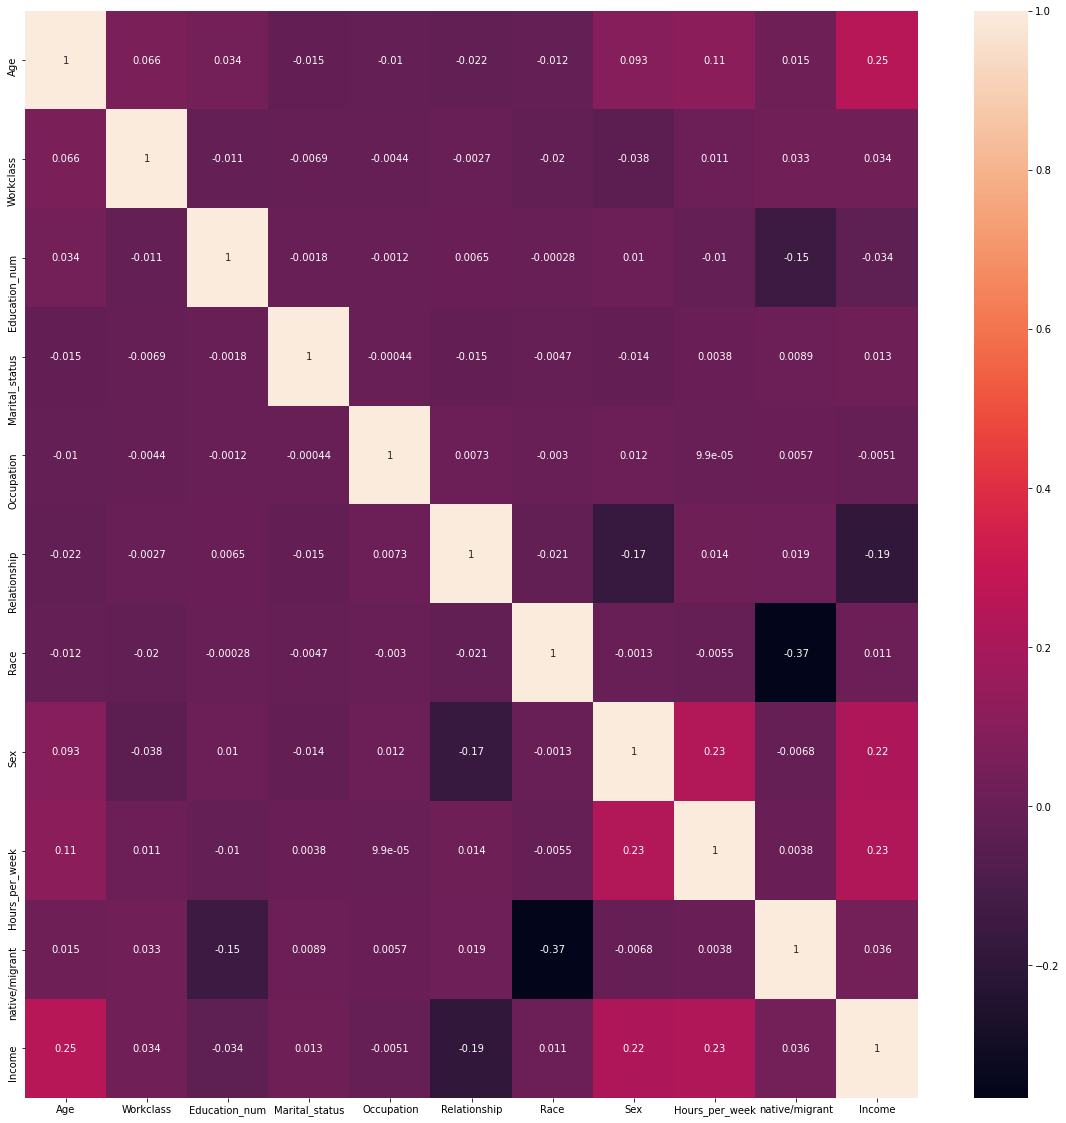

In [410]:
plt.figure(figsize=(20,20))
sns.heatmap(df_cleaned.corr(), annot=True)


From the above map we can see that the most of the independents variables are positively correlated with our dependent variables



## X and y train / test split

In [411]:
df_cleaned.shape

(32216, 11)

In [412]:
# splitting X and y
X = df_cleaned.iloc[:,:-1]
y = df_cleaned.iloc[:,-1]

In [413]:
X.shape,y.shape

((32216, 10), (32216,))

In [414]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((22551, 10), (22551,), (9665, 10), (9665,))

In [415]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [416]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((22551, 10), (9665, 10), (22551,), (9665,))

## Building the model.


In [445]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier


In [446]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [447]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [421]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.75406104500776
[[6450  882]
 [1495  838]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      7332
           1       0.49      0.36      0.41      2333

    accuracy                           0.75      9665
   macro avg       0.65      0.62      0.63      9665
weighted avg       0.73      0.75      0.74      9665



In [425]:
from sklearn.linear_model import LinearRegression

In [426]:
lrg=LogisticRegression()
lrg.fit(X_train,y_train)
lrg.score(X_train,y_train)
predlrg=lrg.predict(X_test)
print(accuracy_score(y_test,predlrg))
print(confusion_matrix(y_test,predlrg))
print(classification_report(y_test,predlrg))

0.7601655457837558
[[6804  528]
 [1790  543]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85      7332
           1       0.51      0.23      0.32      2333

    accuracy                           0.76      9665
   macro avg       0.65      0.58      0.59      9665
weighted avg       0.72      0.76      0.73      9665



In [428]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7483704086911537
[[6381  951]
 [1481  852]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      7332
           1       0.47      0.37      0.41      2333

    accuracy                           0.75      9665
   macro avg       0.64      0.62      0.63      9665
weighted avg       0.73      0.75      0.74      9665



In [429]:
from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
svc.score(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7578892912571132
[[7307   25]
 [2315   18]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7332
           1       0.42      0.01      0.02      2333

    accuracy                           0.76      9665
   macro avg       0.59      0.50      0.44      9665
weighted avg       0.68      0.76      0.66      9665



In [430]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(X_train,y_train)
    svc.score(X_train,y_train)
    predsvc=svc.predict(X_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [431]:
svmkernel('rbf')

0.7788929125711329
[[6925  407]
 [1730  603]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      7332
           1       0.60      0.26      0.36      2333

    accuracy                           0.78      9665
   macro avg       0.70      0.60      0.61      9665
weighted avg       0.75      0.78      0.74      9665



In [434]:
# Predicted values
y_head_lrg = lrg.predict(X_test)
knn3 = KNeighborsClassifier(n_neighbors = 5)
knn3.fit(X_train, y_train)
y_head_knn = knn3.predict(X_test)
y_head_svc = svc.predict(X_test)
y_head_dtc = dtc.predict(X_test)


In [435]:
from sklearn.metrics import confusion_matrix

cm_lrg = confusion_matrix(y_test,y_head_lrg)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svc = confusion_matrix(y_test,y_head_svc)
cm_dtc = confusion_matrix(y_test,y_head_dtc)

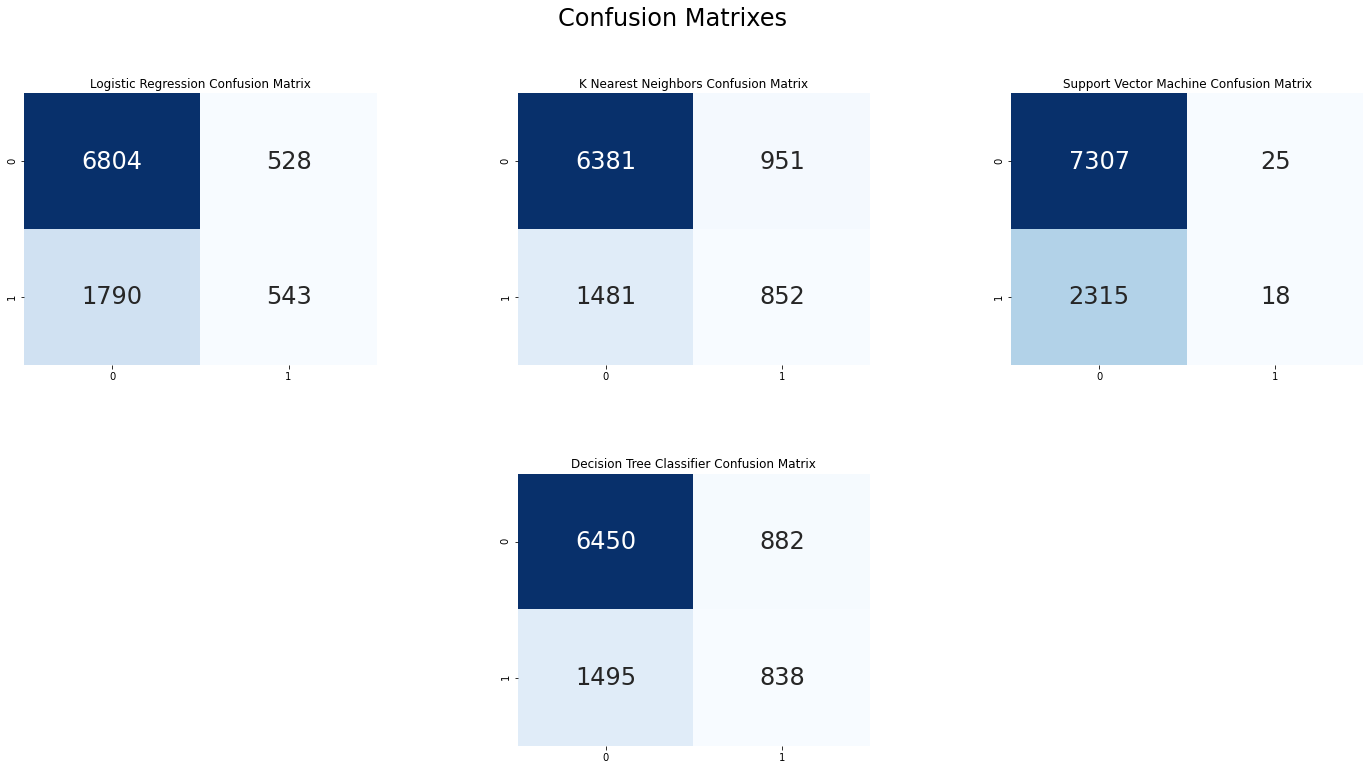

In [436]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lrg,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [437]:
def train_n_ret_score(estimator):
  """
  train the model and return the accuracy score of ther model
  """
  model = estimator
  model.fit(X_train,y_train)
  return model.score(X_test,y_test)


In [438]:
# logistic regression
train_n_ret_score(LogisticRegression(max_iter=1000,C=10))

0.7601655457837558

In [439]:
# svc
train_n_ret_score(SVC())

0.7788929125711329

In [440]:
# decision tree
train_n_ret_score(DecisionTreeClassifier())

0.7543714433523021

In [441]:
# Adaboost
train_n_ret_score(AdaBoostClassifier(base_estimator=LogisticRegression()))

0.7589239524055872

In [442]:
# KNN
train_n_ret_score(KNeighborsClassifier())

0.7483704086911537

In [443]:
# Random Forest
train_n_ret_score(RandomForestClassifier())

0.7572684945680289

In [455]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc


In [458]:
knn=KNeighborsClassifier()
svc=SVC()
lrg=LogisticRegression()
dtc=DecisionTreeClassifier(random_state=56)
gnb=GaussianNB()
rfc=RandomForestClassifier(random_state=56)
gbc=GradientBoostingClassifier(random_state=56)
abc=AdaBoostClassifier(random_state=56)
etc=ExtraTreesClassifier(random_state=56)

In [459]:
models = []
models.append(('KNeighborsClassifier', knn))
models.append(('SVC', svc))
models.append(('LogisticRegression', lrg))
models.append(('DecisionTreeClassifier', dtc))
models.append(('GaussianNB', gnb))
models.append(('RandomForestClassifier', rfc))
models.append(('GradientBoostingClassifier', gbc))
models.append(('ExtraTreesClassifier',etc))
models.append(('AdaBoostClassifier',abc))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.7483704086911537


Cross_Val_Score =  0.7534454795124562


roc_auc_score =  0.6177448134395633


classification_report
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      7332
           1       0.47      0.37      0.41      2333

    accuracy                           0.75      9665
   macro avg       0.64      0.62      0.63      9665
weighted avg       0.73      0.75      0.74      9665



[[6381  951]
 [1481  852]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC()


Accuracy_score =  0.7788929125711329


Cross_Val_Score =  0.7584430118070214


roc_auc_score =  0.6014777011632946


classification_report
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      7332
           1       0.60      0.26      0.36      23

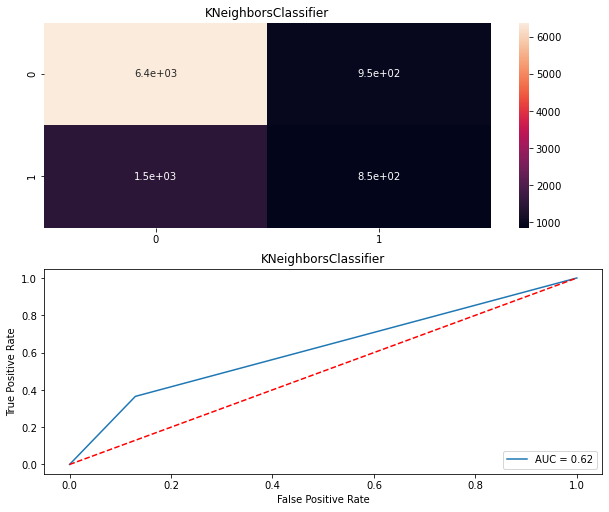

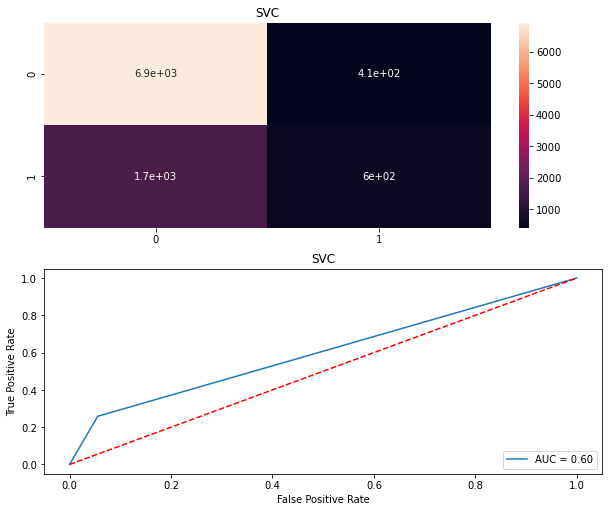

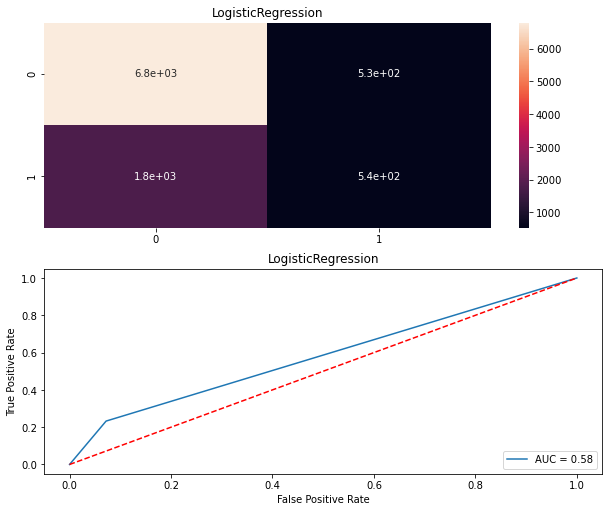

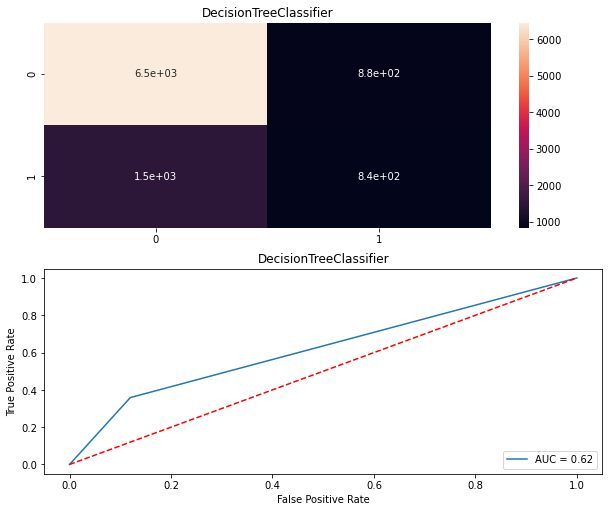

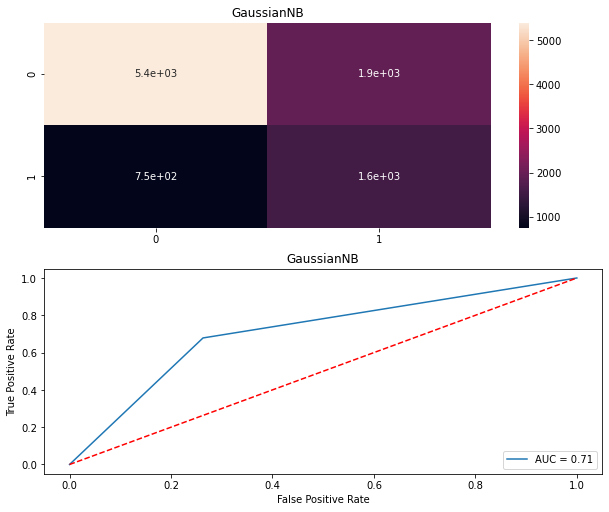

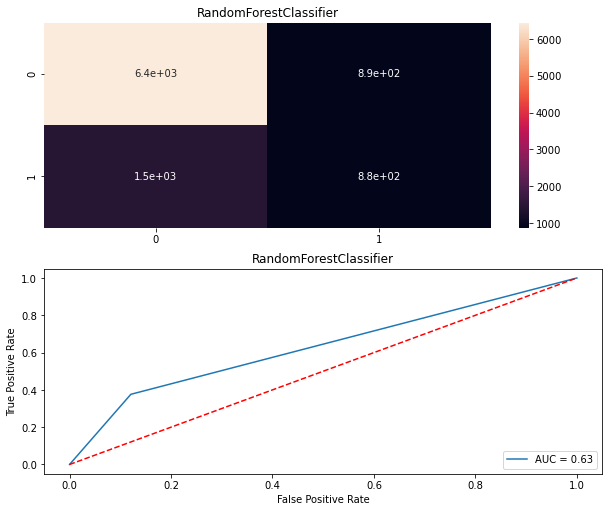

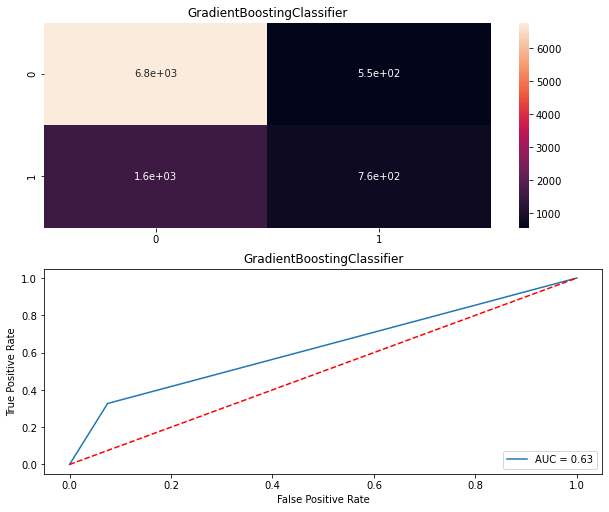

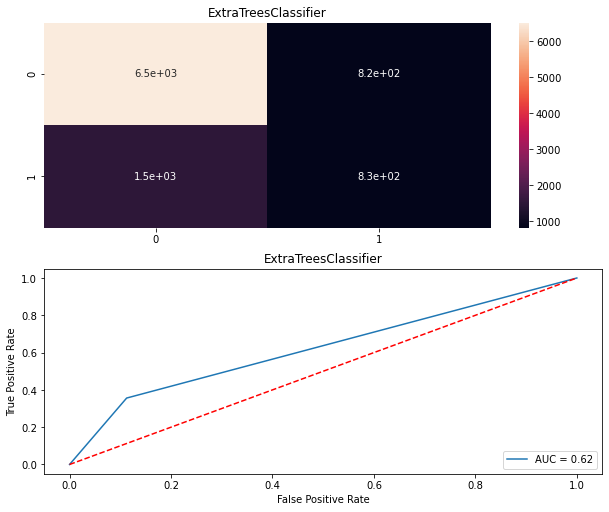

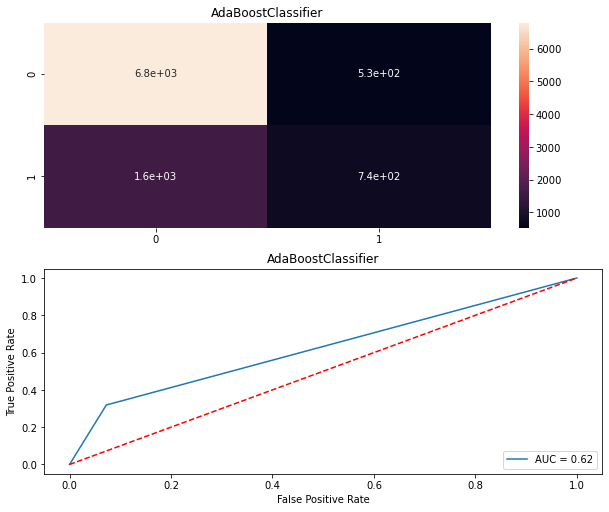

In [460]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [461]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.748370,0.753445,0.617745
1,SVC,0.778893,0.758443,0.601478
2,LogisticRegression,0.760166,0.760399,0.580367
3,DecisionTreeClassifier,0.754371,0.760151,0.619508
4,GaussianNB,0.722814,0.675373,0.707716
5,RandomForestClassifier,0.757786,0.764093,0.627750
6,GradientBoostingClassifier,0.780652,0.783958,0.626017
7,ExtraTreesClassifier,0.759234,0.766017,0.621837
8,AdaBoostClassifier,0.780652,0.783431,0.623240


Most of models are performing well but not giving accuracy is the highest and crossval score is also highest, so we choose GradientBoostingClassifier as my final model as the accuracy and cross val score is high

# selecting the best model

In [462]:
best_model = GradientBoostingClassifier()

In [463]:
best_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [464]:
train_n_ret_score(GradientBoostingClassifier())

0.7806518365235385

In [465]:
y_preds = best_model.predict(X_test)

In [466]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      7332
           1       0.58      0.33      0.42      2333

    accuracy                           0.78      9665
   macro avg       0.70      0.63      0.64      9665
weighted avg       0.76      0.78      0.76      9665



# saving the model

In [467]:
import joblib 

In [468]:
joblib.dump(best_model,'censusincome.pkl')

['censusincome.pkl']

# summary

we have concluded that the GradientBoostingClassifier model will be best for census income dataset and above all analysis done with all plots 